<h1 style="color: rgb(0, 100, 150);font-size: 2rem;font-family: 'system-ui';font-weight: bold; ">Customer Personality Analysis (DBSCAN)</h1>

<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem;font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">Importing Python libraries</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem;font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">Read the Data</h1>

In [3]:
df=pd.read_csv("marketing_campaign.csv",sep="\t")

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


In [6]:
df.shape

(2240, 29)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [8]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [9]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [10]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem;font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">Data Preprocessing</h1>

In [11]:
df=df.drop_duplicates()

In [12]:
def acceptedCmp(x):
    if x["AcceptedCmp1"]+x["AcceptedCmp2"]+x["AcceptedCmp3"]+x["AcceptedCmp4"]+x["AcceptedCmp5"]==0:
        return 0
    return 1

In [13]:
df["Age"]=2023-df["Year_Birth"]
df["Children"]=df["Kidhome"]+df["Teenhome"]
df["Dt_Customer"]=2023-pd.DatetimeIndex(df['Dt_Customer']).year
df["AcceptedCmp"]=df.apply(lambda x: acceptedCmp(x),axis=1)
df["Income"]=df["Income"].fillna(df["Income"].median())

In [14]:
df=df.drop(["ID","Year_Birth","Kidhome","Teenhome","AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Z_CostContact","Z_CostContact","Z_Revenue"],axis=1)

In [15]:
df.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Children,AcceptedCmp
0,Graduation,Single,58138.0,11,58,635,88,546,172,88,...,3,8,10,4,7,0,1,66,0,0
1,Graduation,Single,46344.0,9,38,11,1,6,2,1,...,2,1,1,2,5,0,0,69,2,0
2,Graduation,Together,71613.0,10,26,426,49,127,111,21,...,1,8,2,10,4,0,0,58,0,0
3,Graduation,Together,26646.0,9,26,11,4,20,10,3,...,2,2,0,4,6,0,0,39,1,0
4,PhD,Married,58293.0,9,94,173,43,118,46,27,...,5,5,3,6,5,0,0,42,1,0


In [16]:
df["Education"].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [17]:
df["Marital_Status"].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [18]:
df["Age"].value_counts()

47     89
52     87
48     83
51     79
45     77
53     77
50     74
58     74
54     71
49     69
67     55
65     53
44     53
46     52
71     52
55     51
64     51
69     50
57     50
63     49
68     49
41     45
60     45
56     44
61     44
72     43
66     43
59     42
40     42
37     42
43     39
42     39
39     38
62     36
70     35
38     32
34     30
74     30
35     29
73     29
36     27
75     21
33     18
77     16
76     16
32     15
31     13
78      8
79      7
80      7
28      5
30      5
29      3
27      2
83      1
130     1
124     1
82      1
123     1
Name: Age, dtype: int64

In [19]:
df["Children"].value_counts()

1    1128
0     638
2     421
3      53
Name: Children, dtype: int64

In [20]:
df["Complain"].value_counts()

0    2219
1      21
Name: Complain, dtype: int64

<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem;font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">Plot the Data</h1>

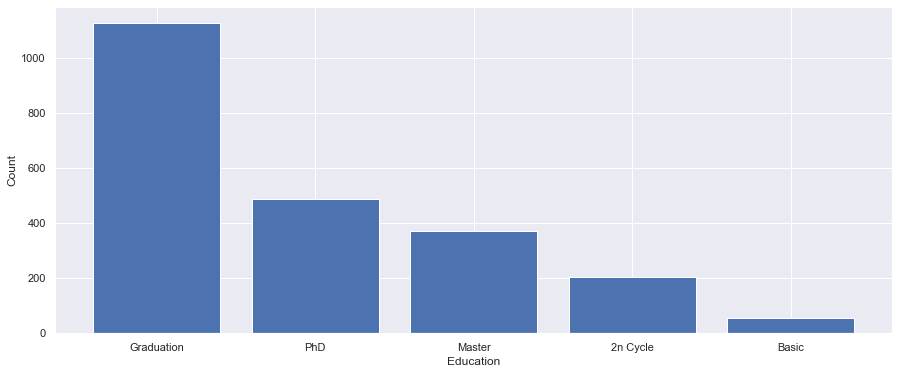

In [21]:
plt.figure(figsize=(15,6))
plt.bar(df["Education"].value_counts().keys(),df["Education"].value_counts().tolist())
plt.xlabel("Education")
plt.ylabel("Count")
plt.show()

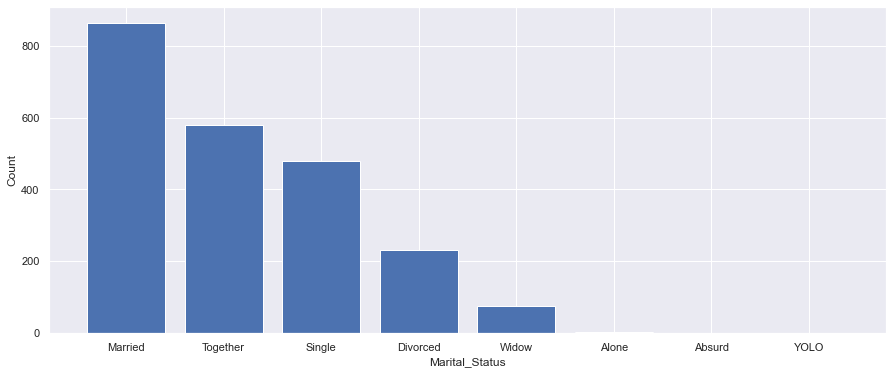

In [22]:
plt.figure(figsize=(15,6))
plt.bar(df["Marital_Status"].value_counts().keys(),df["Marital_Status"].value_counts().tolist())
plt.xlabel("Marital_Status")
plt.ylabel("Count")
plt.show()

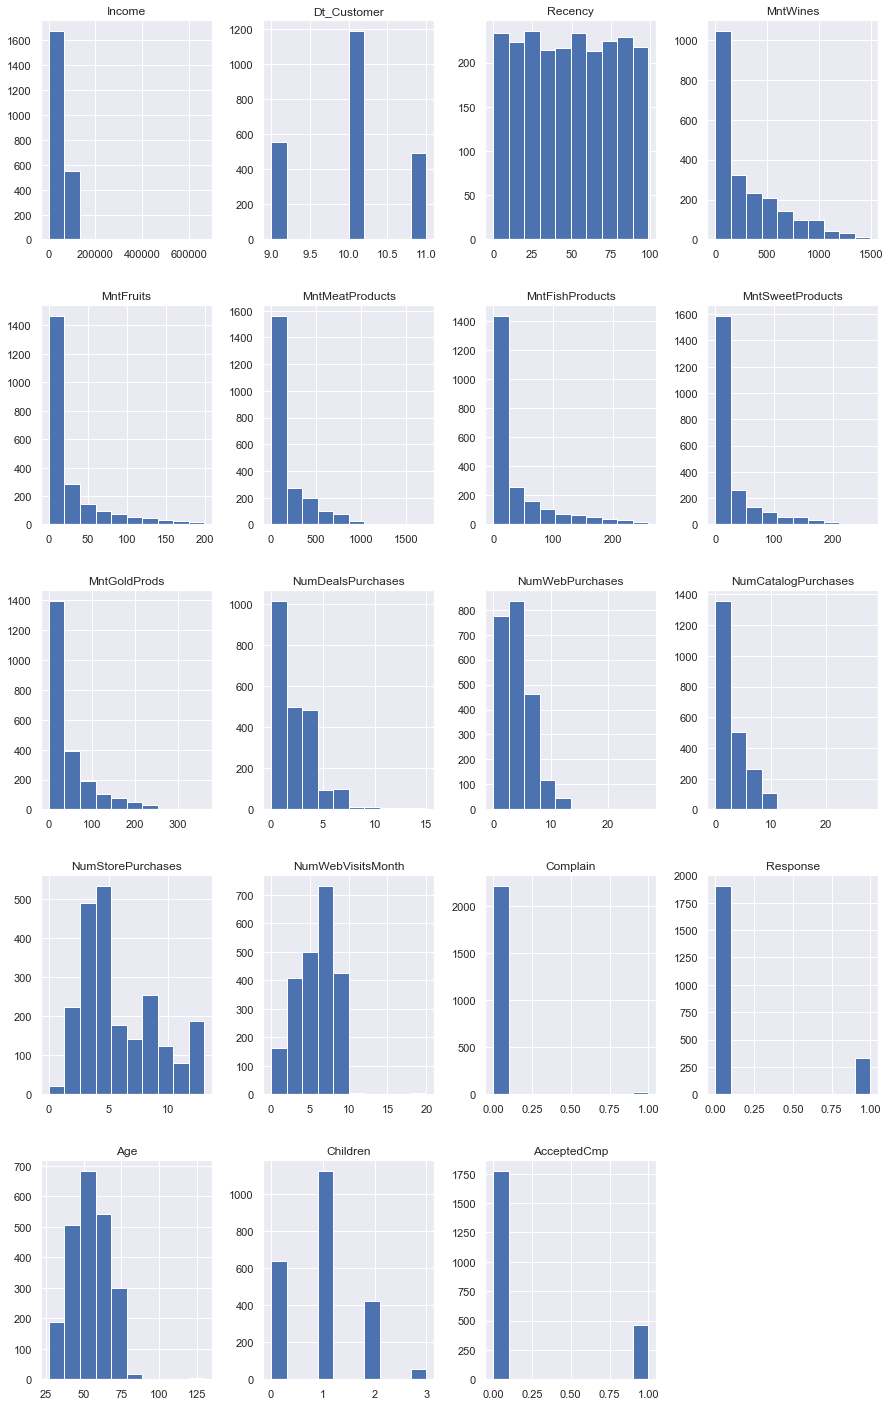

In [23]:
df.hist(figsize=(15,25))
plt.show()

<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem;font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">Vectorize the Data</h1>

In [24]:
ohe = OneHotEncoder(categories='auto')
feature_arr = ohe.fit_transform(df[['Marital_Status','Education']]).toarray()
feature_labels = ohe.categories_

In [25]:
feature_labels = np.array(feature_labels,dtype=object).ravel()

In [26]:
newArray=[]
for i in feature_labels:
    for j in i:
        newArray.append(j)

In [27]:
features = pd.DataFrame(feature_arr, columns=newArray)

In [28]:
df=df.drop(["Marital_Status","Education"],axis=1)

In [29]:
data=pd.concat([df,features],axis=1, join='inner')

In [30]:
data.columns

Index(['Income', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response', 'Age', 'Children', 'AcceptedCmp', 'Absurd',
       'Alone', 'Divorced', 'Married', 'Single', 'Together', 'Widow', 'YOLO',
       '2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD'],
      dtype='object')

In [31]:
data.isna().sum()

Income                 0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Complain               0
Response               0
Age                    0
Children               0
AcceptedCmp            0
Absurd                 0
Alone                  0
Divorced               0
Married                0
Single                 0
Together               0
Widow                  0
YOLO                   0
2n Cycle               0
Basic                  0
Graduation             0
Master                 0
PhD                    0
dtype: int64

In [32]:
data.head()

,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,Married,Single,Together,Widow,YOLO,2n Cycle,Basic,Graduation,Master,PhD
0,58138.0,11,58,635,88,546,172,88,88,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,46344.0,9,38,11,1,6,2,1,6,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,71613.0,10,26,426,49,127,111,21,42,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,26646.0,9,26,11,4,20,10,3,5,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,58293.0,9,94,173,43,118,46,27,15,5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [33]:
scaled_features = data.copy()

In [34]:
col_names = ['Income', 'Dt_Customer', 'Recency','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases','NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases','NumWebVisitsMonth', 'Complain', 'Response', 'Age', 'Children','AcceptedCmp']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [35]:
scaled_features[col_names] = features
scaled_features.head()

,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,Married,Single,Together,Widow,YOLO,2n Cycle,Basic,Graduation,Master,PhD
0,0.235696,1.502225,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,0.349414,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.235454,-1.420036,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,-0.168236,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.773999,0.041094,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,-0.685887,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.022355,-1.420036,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,-0.168236,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.241888,-1.420036,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,1.384715,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [36]:
scaled_features.describe()

,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,Married,Single,Together,Widow,YOLO,2n Cycle,Basic,Graduation,Master,PhD
count,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,-3.625262e-17,-1.081873e-15,2.277444e-17,-9.605412e-17,-4.173249e-17,2.493045e-17,5.105043e-18,-2.131232e-18,-2.874685e-17,-4.909267e-17,...,0.385714,0.214286,0.258929,0.034375,0.000893,0.090625,0.024107,0.503125,0.165179,0.216964
std,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,...,0.486872,0.410418,0.438144,0.182231,0.029874,0.287139,0.153416,0.500102,0.371425,0.412270
min,-2.017707e+00,-1.420036e+00,-1.696001e+00,-9.031668e-01,-6.614492e-01,-7.398135e-01,-6.870680e-01,-6.557331e-01,-8.440457e-01,-1.203537e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.671053e-01,4.109430e-02,-8.671566e-01,-8.325919e-01,-6.363012e-01,-6.689119e-01,-6.321399e-01,-6.315032e-01,-6.714858e-01,-6.858866e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-3.421472e-02,4.109430e-02,-3.777284e-03,-3.875991e-01,-4.602650e-01,-4.429132e-01,-4.673554e-01,-4.618937e-01,-3.838859e-01,-1.682363e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,6.412408e-01,4.109430e-02,8.596020e-01,5.952483e-01,1.684356e-01,2.882592e-01,2.284015e-01,1.438543e-01,2.296605e-01,3.494139e-01,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,2.454534e+01,1.502225e+00,1.722981e+00,3.533390e+00,4.343008e+00,6.904261e+00,4.055064e+00,5.716737e+00,6.096698e+00,6.561217e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
X=scaled_features.to_numpy()

<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem;font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">Correlation Matrix</h1>

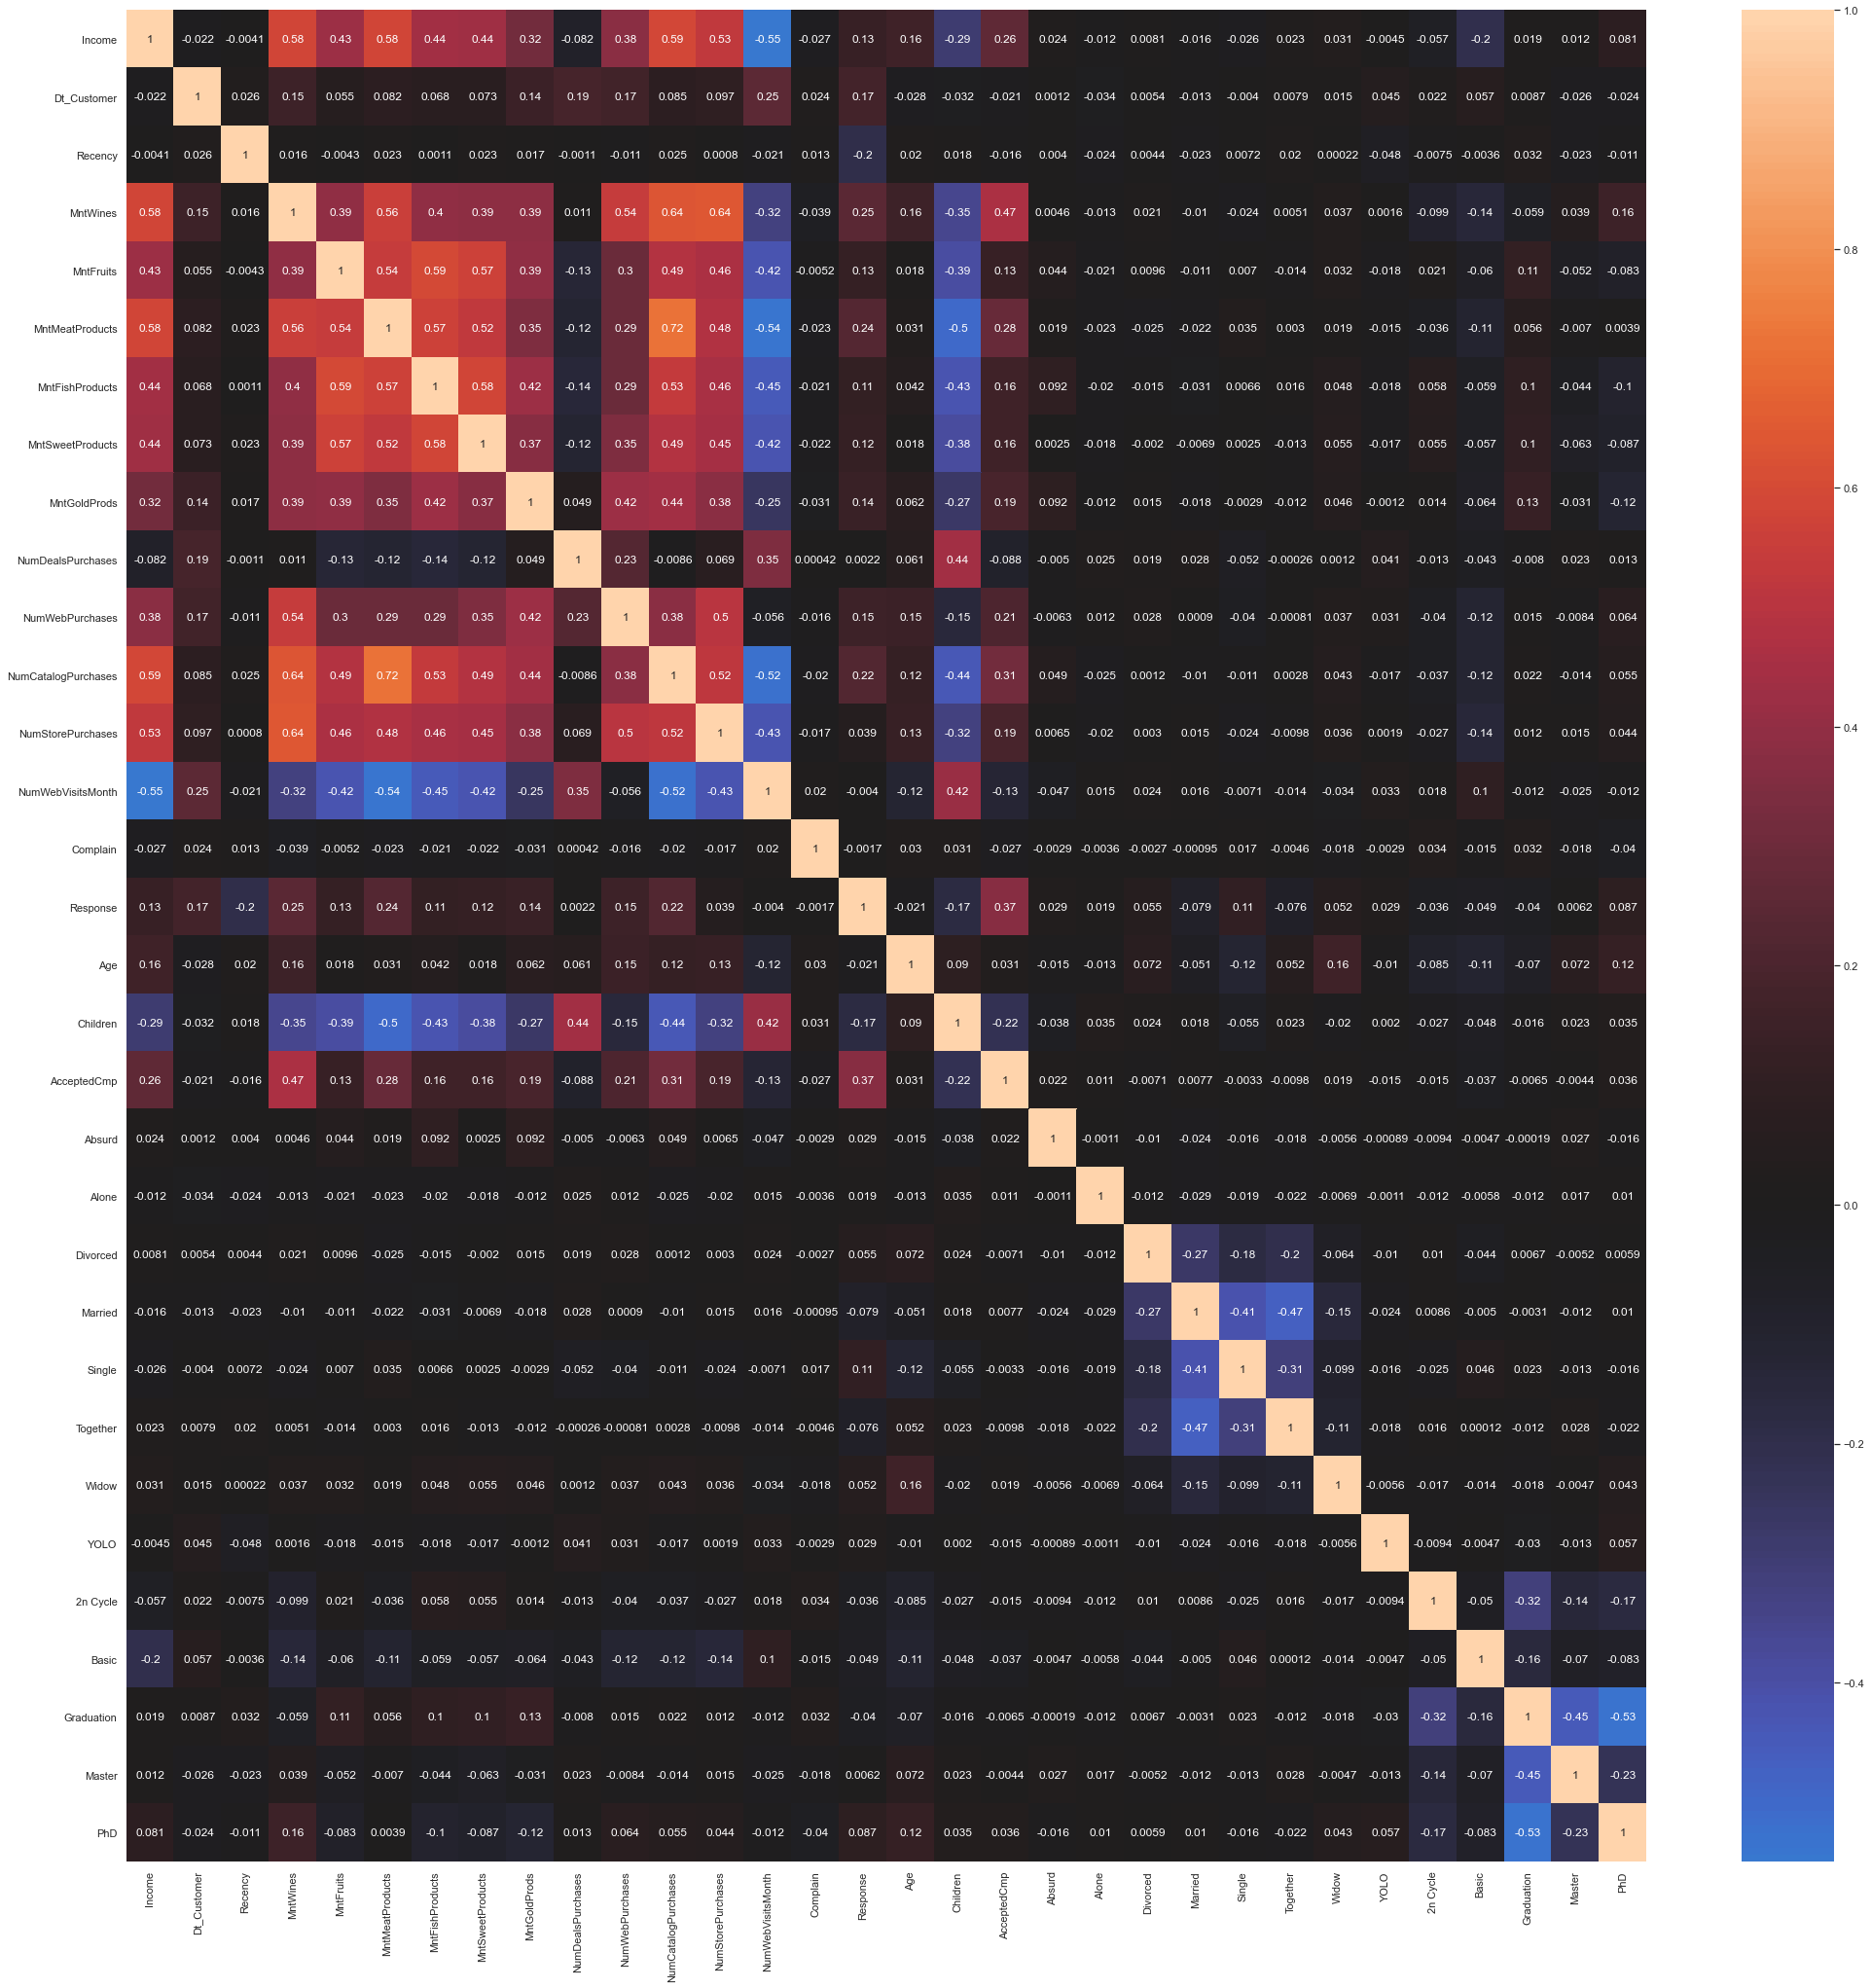

In [38]:
corrmat= scaled_features.corr()
plt.figure(figsize=(35,35))  
sns.heatmap(corrmat,annot=True, center=0)
plt.show()

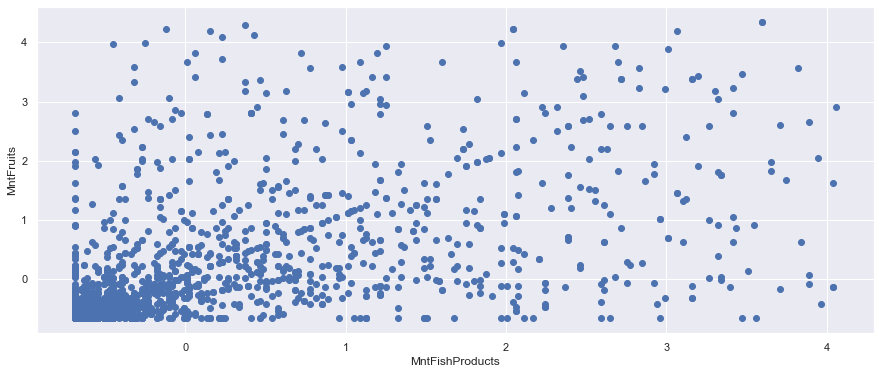

In [39]:
plt.figure(figsize=(15,6))  
plt.scatter(scaled_features["MntFishProducts"],scaled_features["MntFruits"])
plt.xlabel("MntFishProducts")
plt.ylabel("MntFruits")
plt.show()

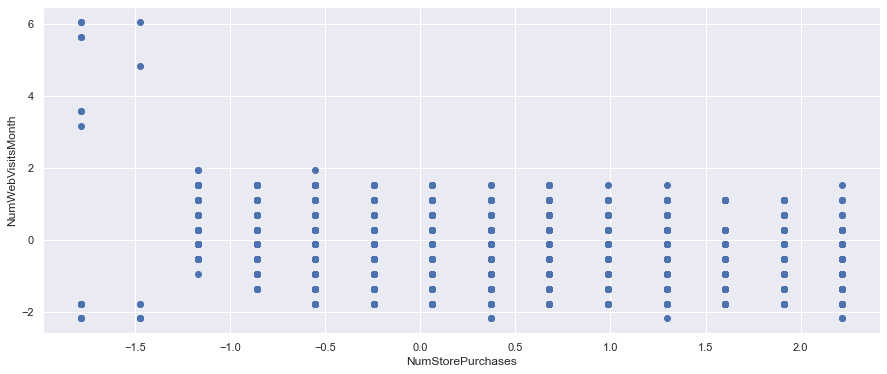

In [40]:
plt.figure(figsize=(15,6))  
plt.scatter(scaled_features["NumStorePurchases"],scaled_features["NumWebVisitsMonth"])
plt.xlabel("NumStorePurchases")
plt.ylabel("NumWebVisitsMonth")
plt.show()

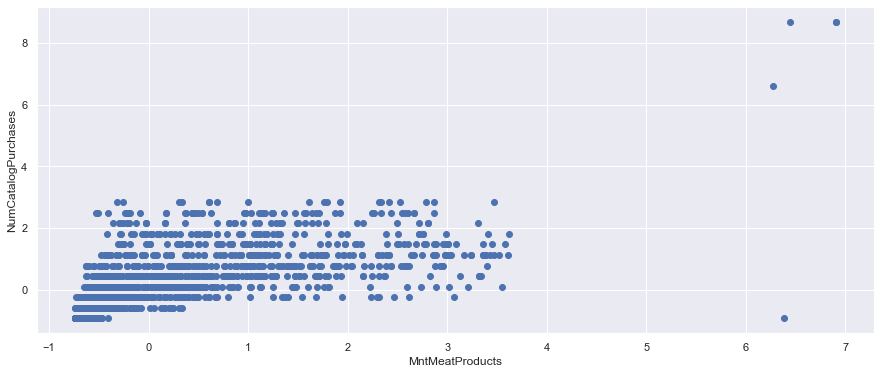

In [41]:
plt.figure(figsize=(15,6))  
plt.scatter(scaled_features["MntMeatProducts"],scaled_features["NumCatalogPurchases"])
plt.xlabel("MntMeatProducts")
plt.ylabel("NumCatalogPurchases")
plt.show()

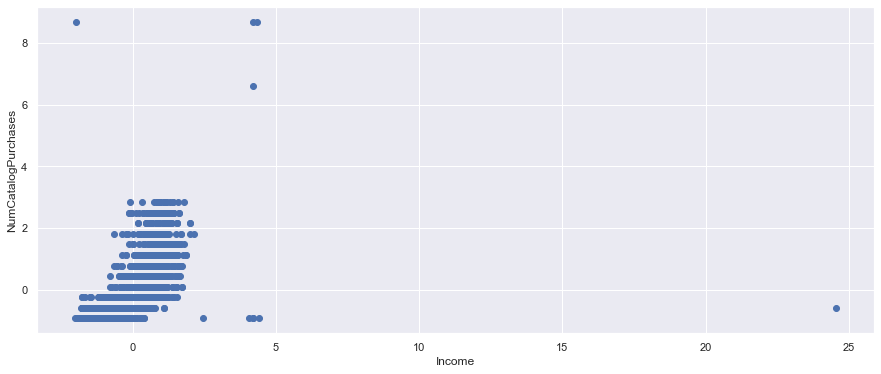

In [42]:
plt.figure(figsize=(15,6))  
plt.scatter(scaled_features["Income"],scaled_features["NumCatalogPurchases"])
plt.xlabel("Income")
plt.ylabel("NumCatalogPurchases")
plt.show()

<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem;font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">PCA</h1>

In [43]:
pca = PCA(n_components=2)
pca.fit(X)
X= pca.transform(X)

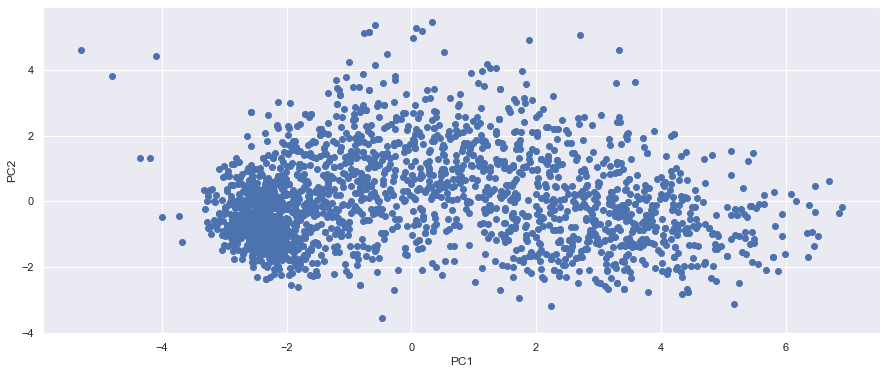

In [44]:
plt.figure(figsize=(15,6))  
plt.scatter(X[:,0],X[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem;font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">DBSCAN</h1>

In [45]:
db=DBSCAN(eps=1.298,min_samples=256)

In [46]:
y=db.fit_predict(X)

In [47]:
np.unique(db.labels_)

array([-1,  0,  1], dtype=int64)

In [48]:
sil=silhouette_score(X,y)
print("Silhouette Score:"+str(sil))

Silhouette Score:0.4458179179229538


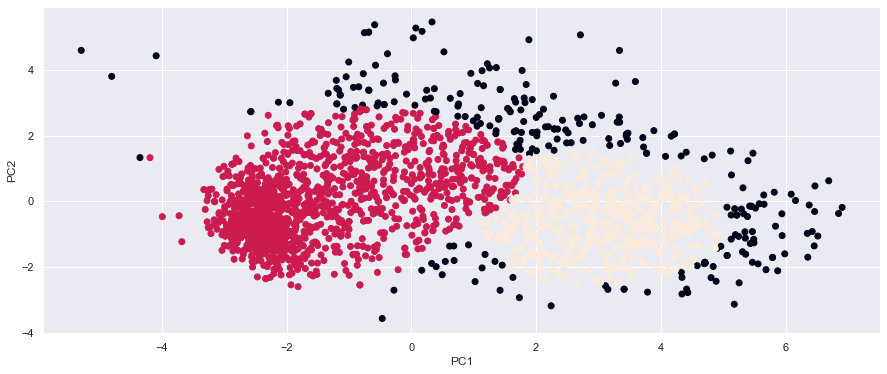

In [49]:
plt.figure(figsize=(15,6))  
plt.scatter(X[:,0],X[:,1],c=db.labels_)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [50]:
clusters = db.labels_
n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise_ = list(clusters).count(-1)

In [55]:
for i in range(n_clusters_):
    print('Cluster', i, ':', len(clusters[clusters==i]))
print('Outliers  :',n_noise_)

Cluster 0 : 1463
Cluster 1 : 518
Outliers  : 259
